# What is Algorithmic Trading Strategy ?
#### Developing an Algorithmic trading strategy with Python is something that goes through a couple of phases, just like when you build machine learning models: you formulate a strategy and specify it in a form that you can test on your computer, you do some preliminary testing or back testing, you optimize your strategy and lastly, you evaluate the performance and robustness of your strategy.

#### Trading strategies are usually verified by back testing: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed.

#### This way, you can get an idea of the effectiveness of your strategy, and you can use it as a starting point to optimize and improve your strategy before applying it to real markets.

#### This relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future.

#### And any strategy that has performed poorly in the past will probably also do badly in the future.

# ----------------------------------------------------------------------- #

# Algoritmik Ticaret Stratejisi Nedir?
#### Python ile bir Algoritmik ticaret stratejisi geliştirmek, tıpkı makine öğrenimi modelleri oluşturduğunuzda olduğu gibi, birkaç aşamadan geçen bir şeydir: Bir strateji formüle eder ve bilgisayarınızda test edebileceğiniz bir biçimde belirtirsiniz. bazı ön testler veya geri testler, stratejinizi optimize edersiniz ve son olarak stratejinizin performansını ve sağlamlığını değerlendirirsiniz.

#### Alım satım stratejileri genellikle geriye dönük testlerle doğrulanır: geliştirdiğiniz stratejiyle tanımlanan kuralları kullanarak geçmişte gerçekleşmiş olabilecek alım satımları geçmiş verilerle yeniden yapılandırırsınız.

#### Bu şekilde, stratejinizin etkinliği hakkında bir fikir edinebilir ve stratejinizi gerçek pazarlara uygulamadan önce optimize etmek ve iyileştirmek için bir başlangıç ​​noktası olarak kullanabilirsiniz.

#### Bu, büyük ölçüde, geçmişte iyi sonuç vermiş herhangi bir stratejinin gelecekte de iyi sonuç vereceğine dair temel teoriye veya inanca dayanır. gelecek.

 #### Ve geçmişte kötü performans gösteren herhangi bir strateji muhtemelen gelecekte de kötü sonuç verecektir.

# Let’s Build an Algorithmic Trading Strategy with Python and Machine Learning

##  Python ve Makine Öğrenimi ile Algoritmik Bir Ticaret Stratejisi Oluşturalım

#### This program uses the dual moving average crossover to determine when to buy and sell stocks.

#### Bu program, hisse senetlerinin ne zaman alınıp satılacağını belirlemek için ikili hareketli ortalama geçişini kullanır.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
apple = pd.read_csv("AAPL.csv")

In [3]:
apple.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


#### Let’s Visualize the data

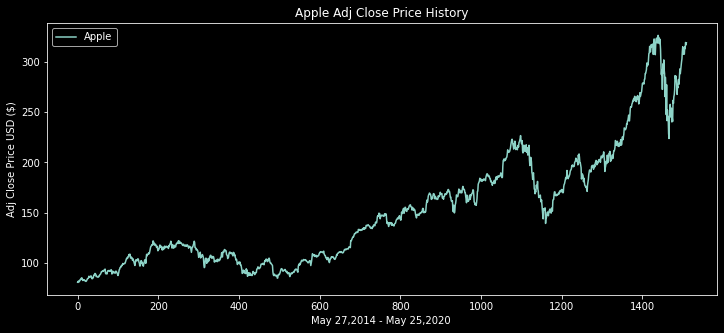

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2014 - May 25,2020 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

#### Create a Simple moving average with a 30 day window

#### 30 günlük bir pencereyle Basit bir hareketli ortalama oluşturun

In [5]:
sma30=pd.DataFrame()

In [6]:
sma30["Adj Close Price"]=apple["Adj Close Price"].rolling(window=30).mean()

In [7]:
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,287.864806
1506,289.577426
1507,291.594106
1508,293.310716


#### To create a Simple moving average 100 day window

#### Basit bir hareketli ortalama 100 günlük pencere oluşturmak için

In [8]:
sma100=pd.DataFrame()

In [9]:
sma100["Adj Close Price"]= apple["Adj Close Price"].rolling(window=100).mean()

In [10]:
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,289.734840
1506,290.037927
1507,290.345799
1508,290.630966


#### Now let’s Visualize the new data

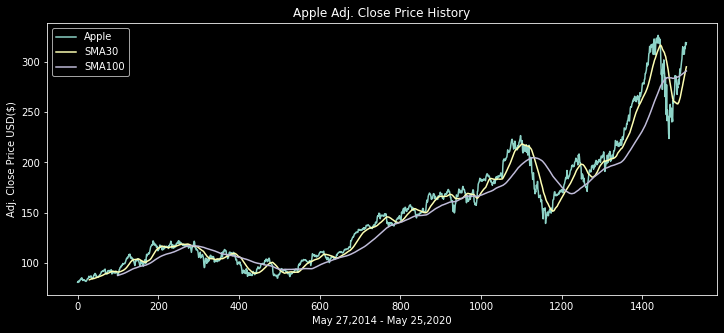

In [11]:
plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.plot(sma30['Adj Close Price'], label='SMA30')
plt.plot(sma100['Adj Close Price'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 27,2014 - May 25,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

#### Now create a new Data Frame to store all the data

#### Şimdi tüm verileri depolamak için yeni bir Veri Çerçevesi oluşturun

In [12]:
data=pd.DataFrame()

In [13]:
data["apple"]=apple["Adj Close Price"]

In [14]:
data["SMA30"]=sma30["Adj Close Price"]

In [15]:
data["SMA100"]=sma100["Adj Close Price"]

In [16]:
data

,apple,SMA30,SMA100
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


#### Create a function to signal when to buy or sell stock

#### Hisse senedinin ne zaman alınacağını veya satılacağını bildirmek için bir işlev oluşturun

In [27]:
def buySell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data ['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['apple'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['apple'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy, sigPriceSell)

#### To store the buy and sell  data into a variable

In [28]:
buySell=buySell(data)

In [29]:
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]

In [30]:
data

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


#### Now let’s Visualize the data and strategy to buy and sell stock

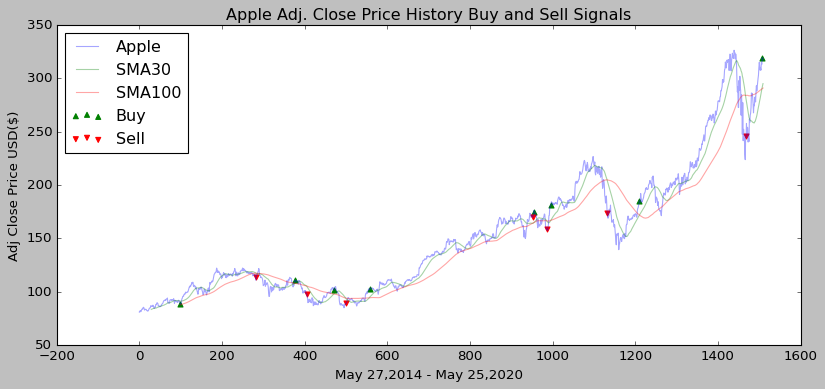

In [31]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data['apple'], label='Apple', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 27,2014 - May 25,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()